In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


In [2]:
np.random.seed(42)

date_range = pd.date_range(start="2022-01-01", end="2024-12-31", freq="D")


In [3]:
trend = np.linspace(100, 300, len(date_range))
weekly_seasonality = 20 * np.sin(2 * np.pi * date_range.dayofweek / 7)
yearly_seasonality = 30 * np.sin(2 * np.pi * date_range.dayofyear / 365)
noise = np.random.normal(0, 10, len(date_range))

sales = trend + weekly_seasonality + yearly_seasonality + noise


In [4]:
df = pd.DataFrame({
    "date": date_range,
    "sales": sales.astype(int)
})

df.set_index("date", inplace=True)
df.head()


,sales
date,
2022-01-01,85
2022-01-02,84
2022-01-03,108
2022-01-04,133
2022-01-05,120


In [5]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1096 entries, 2022-01-01 to 2024-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   1096 non-null   int64
dtypes: int64(1)
memory usage: 17.1 KB


sales    0
dtype: int64

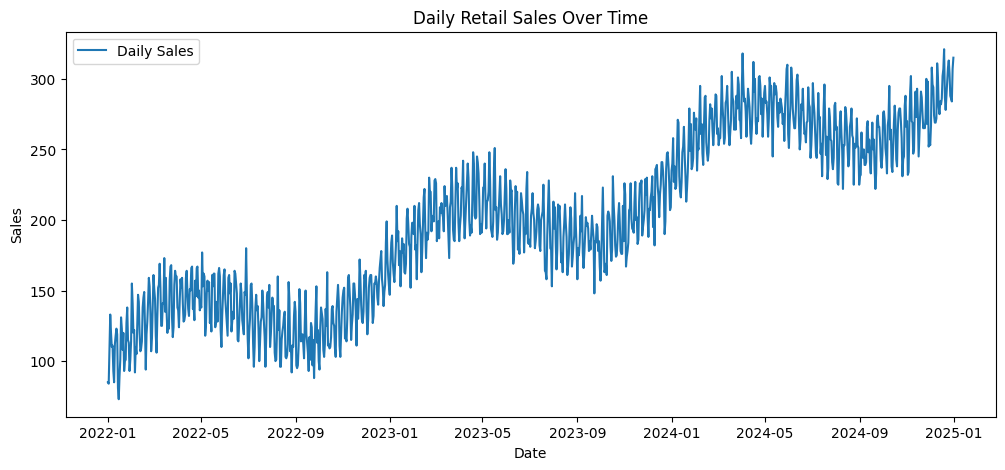

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['sales'], label="Daily Sales")
plt.title("Daily Retail Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


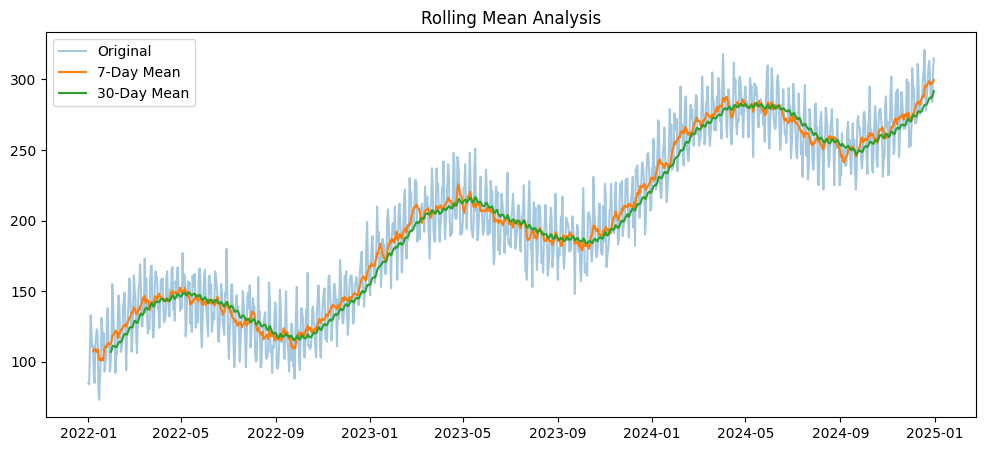

In [7]:
df['rolling_7'] = df['sales'].rolling(7).mean()
df['rolling_30'] = df['sales'].rolling(30).mean()

plt.figure(figsize=(12,5))
plt.plot(df['sales'], alpha=0.4, label="Original")
plt.plot(df['rolling_7'], label="7-Day Mean")
plt.plot(df['rolling_30'], label="30-Day Mean")
plt.legend()
plt.title("Rolling Mean Analysis")
plt.show()


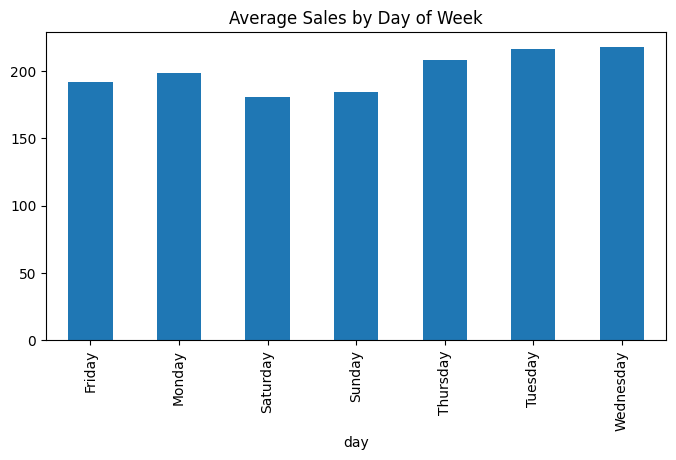

In [8]:
df['day'] = df.index.day_name()

df.groupby('day')['sales'].mean().plot(kind='bar', figsize=(8,4))
plt.title("Average Sales by Day of Week")
plt.show()

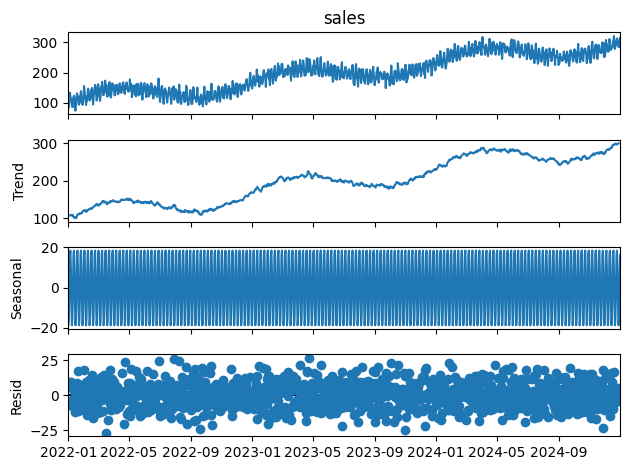

In [9]:
decomposition = seasonal_decompose(df['sales'], model='additive', period=7)
decomposition.plot()
plt.show()


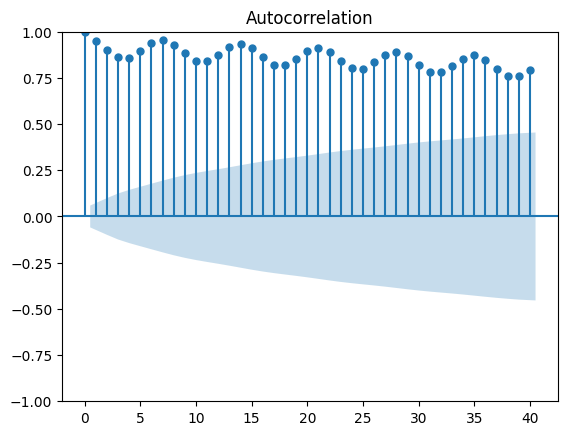

In [10]:
plot_acf(df['sales'], lags=40)
plt.show()


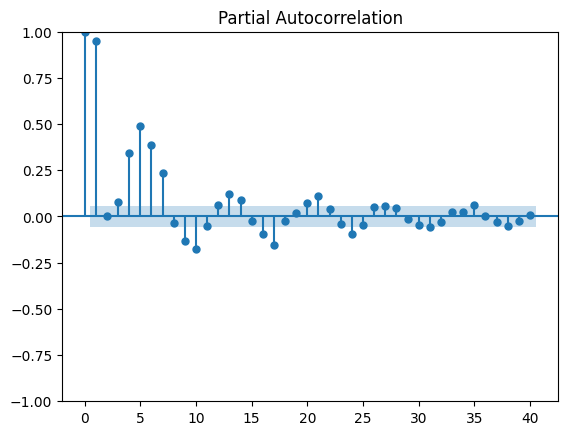

In [11]:
plot_pacf(df['sales'], lags=40)
plt.show()


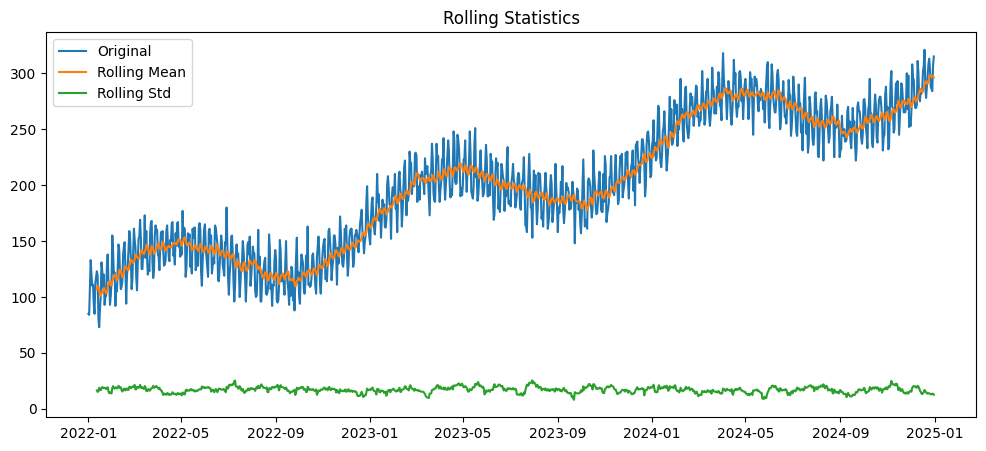

In [12]:
rolling_mean = df['sales'].rolling(12).mean()
rolling_std = df['sales'].rolling(12).std()

plt.figure(figsize=(12,5))
plt.plot(df['sales'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title("Rolling Statistics")
plt.show()


In [13]:
adf_result = adfuller(df['sales'])

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -0.3775805478743915
p-value: 0.9137752643035804


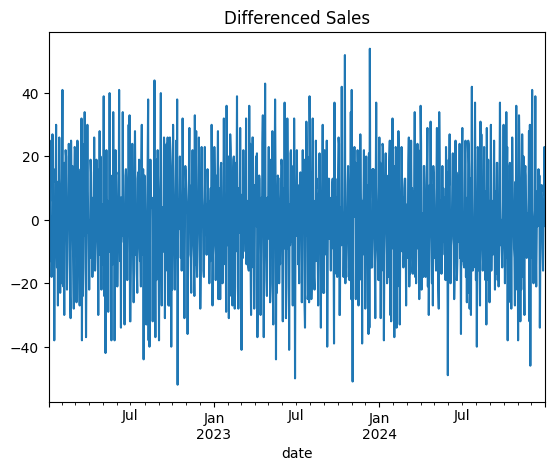

In [14]:
df['sales_diff'] = df['sales'].diff()
df['sales_diff'].dropna().plot(title="Differenced Sales")
plt.show()


In [15]:
adf_diff = adfuller(df['sales_diff'].dropna())

print("ADF Statistic:", adf_diff[0])
print("p-value:", adf_diff[1])


ADF Statistic: -6.61942366814989
p-value: 6.089928742112981e-09


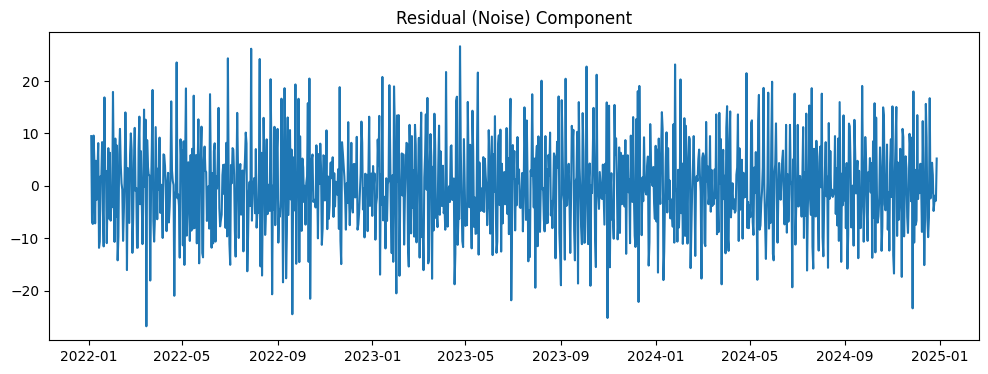

In [16]:
residuals = decomposition.resid

plt.figure(figsize=(12,4))
plt.plot(residuals)
plt.title("Residual (Noise) Component")
plt.show()
